In [1]:
from sys import path
path.append("/home/ec2-user/SageMaker/data-science-development/utils")
path.append("/home/ec2-user/SageMaker/data-science-development/config")

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import os
import torch
import random
import json
import datetime
import time

from torch import nn
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader, WeightedRandomSampler

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from datetime import datetime
from collections import defaultdict, Counter
from tqdm import tqdm 

tqdm.pandas()

In [2]:
skills = pd.read_csv("../Data/skills_one-hot.csv").set_index("candidate_id")
skills.head()

,skill_1,skill_2,skill_3,skill_5,skill_6,skill_7,skill_8,skill_9,skill_12,skill_13,...,skill_3926,skill_3927,skill_3928,skill_3929,skill_3930,skill_3931,skill_3932,skill_3933,skill_3934,skill_3935
candidate_id,,,,,,,,,,,,,,,,,,,,,
84267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84349,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
skills = dict(zip(skills.index, skills.values))

In [4]:
certs = pd.read_csv("../Data/candidate_certificates_one-hot.csv").set_index("candidate_id")
certs.head()

,1,10,11,12,13,14,15,16,17,18,...,W4,W5,W7,W9,WB,WC,WD,WE,WF,ZW
candidate_id,,,,,,,,,,,,,,,,,,,,,
84603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
certs = dict(zip(certs.index, certs.values))

In [6]:
licenses = pd.read_csv("../Data/licenses_one-hot.csv").set_index("candidate_id")
licenses.head()

,A,B,BE,C,CE,D,DE,G
candidate_id,,,,,,,,
84556,0,1,0,0,0,0,0,0
84612,0,0,0,0,0,0,0,1
84731,1,1,0,0,0,0,0,0
85437,0,1,0,0,0,0,0,0
85627,0,1,1,0,0,0,0,0


In [7]:
licenses = dict(zip(licenses.index, licenses.values))

In [8]:
languages = pd.read_csv("../Data/languages_one-hot.csv").set_index("candidate_id")
languages.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
candidate_id,,,,,,,,,,,,,,,,,,,,,
84267,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84349,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84381,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84386,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
84432,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
languages = dict(zip(languages.index, languages.values))

KeyboardInterrupt: 

In [ ]:
addresses = pd.read_csv("../Data/addresses_one-hot.csv").set_index("candidate_id")
addresses.head()

In [ ]:
addresses = dict(zip(addresses.index, addresses.values))

In [ ]:
w2v = json.load(open("../Data/embeddings.json"))
# Convert to ints
w2v = {int(k):{int(k2):v2 for k2, v2 in v.items()} for k, v in w2v.items()}

In [ ]:
# Drop time between? 
# Drop job order
df_pred = pd.read_csv("../Data/df_pred_ext.csv").drop("Unnamed: 0", axis=1)

In [ ]:
df_pred["time_between"] = (df_pred["time_between"] - df_pred["time_between"].mean()) / df_pred["time_between"].std()
df_pred["time_spent"] = (df_pred["time_spent"] - df_pred["time_spent"].mean()) / df_pred["time_spent"].std()

In [ ]:
df_pred.head()

In [ ]:
len(df_pred["function_id"].unique()), len(df_pred["company_name"].unique())

In [ ]:
majority_class = df_pred["isco_code4"].mode().values[0]

In [ ]:
(2 / (0.5 * np.sqrt(df_pred["isco_code4"].value_counts().sort_values().reset_index().drop("index", axis=1)))).plot()

In [ ]:
career_paths = df_pred.groupby("candidate_id")

In [ ]:
candidate_lens = career_paths.apply(lambda x: len(x) - 1).to_dict()

In [ ]:
num_classes = len(df_pred["isco_code4"].unique())
num_features = len(career_paths.mean().columns)
num_classes, num_features

In [ ]:
maximum_career_duration = 25

In [ ]:
# Convert to 2d-arrays, grabbing the last 25 jobs of each candidate and getting rid of candidate_ids as values
career_paths = career_paths.progress_apply(lambda x: x.values[-(maximum_career_duration + 1):,1:])

In [ ]:
# Drop careers that are only 1 job long
career_lens = career_paths.apply(len)
career_paths = career_paths.loc[(career_lens > 1)]

In [ ]:
career_paths = career_paths.loc[career_paths.apply(lambda x: x[-1][-1] != x[-2][-1])]

In [ ]:
career_paths.head()

In [ ]:
idxs = []
x = []
y = []

# max_skills = len([col for col in df_pred if "skill_" in col])

for idx, career in zip(career_paths.index, career_paths.values):
    label = career[-1, -1]
    
    if not np.isnan(label):       
        idxs.append(idx)
        x.append(career[:-1].reshape(len(career) - 1, num_features))
        y.append(label)

idxs = np.array(idxs)
x = np.array(x)
y = np.array(y)

In [ ]:
to_fill = np.zeros([len(x), len(max(x, key = lambda x: len(x))), num_features])

for i,j in enumerate(x):
    if len(j):
        to_fill[i][-len(j):] = j

In [ ]:
max_len = len(max(x, key = lambda x: len(x)))
max_len

In [ ]:
del df_pred
del x

In [ ]:
# Filtered: (113428, 113428)
# Grouped: (176485, 176485)
len(to_fill), len(y)

In [ ]:
# to_fill = to_fill[:50000]
# y = y[:50000]

In [ ]:
def create_loaders(to_fill, idxs, y, split_size=0.8, weight_type=3, batch_size=512):

    # Train test split
    split = split_size

    training = np.array(random.sample(range(len(to_fill)), int(split * len(to_fill))))
    test = np.array(list(set(range(len(to_fill))) - set(training)))

    train_indices, val_indices = idxs[training], idxs[test]
    X_train, X_val = to_fill[training], to_fill[test]
    y_train, y_val = y[training].astype(int), y[test].astype(int)

    # Class weights
    counts = (np.bincount(y_train) + 1)
    
    if weight_type == 1:
        labels_weights = 1. / counts
    elif weight_type == 2:
        labels_weights = 1. / np.sqrt(counts)
    elif weight_type == 3:
        labels_weights = 2. / (0.5 * np.sqrt(counts))
    else:
        return NotImplemented
        
    weights = labels_weights[y_train]
    sampler = WeightedRandomSampler(weights, len(weights))

    # Create dataloaders
    train_data = TensorDataset(torch.Tensor(train_indices), 
                               torch.Tensor(X_train), 
                               torch.Tensor(y_train).type(torch.LongTensor))

    trainloader = DataLoader(train_data, batch_size=batch_size, sampler=sampler)

    val_data = TensorDataset(torch.Tensor(val_indices),
                             torch.Tensor(X_val),
                             torch.Tensor(y_val).type(torch.LongTensor))

    valloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
    
    return trainloader, valloader

In [43]:
class spatial_attention(nn.Module):
    def __init__(self, num_features):
        super(spatial_attention, self).__init__()
        
        self.N = num_features
               
        self.fc1 = nn.Linear(num_features, num_features)
        
        self.softmax = nn.Softmax(dim=-1)
        
    def forward(self, x, x_full):
    
        # Deal with batches 
        time_steps = x.transpose(0, 1)
        att_applied = []
        
        ats = []
                
        # Determine weight of each timestep
        for i, timestep in enumerate(time_steps):          
            st = self.fc1(timestep)
            at = torch.sigmoid(st)
            at = self.softmax(at * (x_full.transpose(0, 1)[i] != 0))
            ats.append(at)
            
        weights = torch.stack((ats)).transpose(0, 1)
        # weights = weights * (x_full != 0)       
        att_applied = x * weights
        
        return att_applied, weights

In [44]:
class temporal_attention(nn.Module):
    def __init__(self, hidden_size, sequence_length=25):
        super(temporal_attention, self).__init__()
        
        # Attention layer
        self.temp_attention = nn.Linear(sequence_length * hidden_size, sequence_length)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, outputs, x):        

        # Prevent complete 0 time steps from receiving any attention
        # x_sum = x.abs().sum(axis=2).unsqueeze(-1)               
        # empty = (x_sum != 0).squeeze(-1)
        
        # Deal with batches 
        # outputs = outputs.transpose(0, 1)
        att_weight = []
        
        # Determine weight of each timestep
        out = self.temp_attention(outputs.flatten(start_dim=1))
        out = self.relu(out)
        weights = self.softmax(out).unsqueeze(-1).transpose(1, 2)
                   
        attn_applied = torch.bmm(weights, outputs).squeeze(1)

        return attn_applied, weights.squeeze(1)

In [45]:
class eLSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, 
                 skills, certs, licenses, languages, addresses, 
                 w2v, candidate_lengths, max_len, dropout_prob=0.3,
                 skill_embedding_size=50, certs_embedding_size=20,
                 license_embedding_size=3, language_embedding_size=10,
                 address_embedding_size=25, function_embedding_size=50, 
                 isco4_embedding_size=25, education_embedding_size=3, 
                 isco_level_embedding_size=3, company_embedding_size=50):
        
        super(eLSTM, self).__init__()
              
        self.num_classes = num_classes
        self.input_size = input_size + 300
        self.hidden_size = hidden_size
        
        # Static embeddings: skills, certificates, licenses, languages
        self.skill_embedding = nn.Linear(317, skill_embedding_size, bias=False)
        self.skill_embedding.weight.data = torch.randn_like(self.skill_embedding.weight) 
        
        self.certs_embedding = nn.Linear(98, certs_embedding_size, bias=False)
        self.certs_embedding.weight.data = torch.randn_like(self.certs_embedding.weight) 
        
        self.license_embedding = nn.Linear(8, license_embedding_size, bias=False)
        self.license_embedding.weight.data = torch.randn_like(self.license_embedding.weight) 
        
        self.language_embedding = nn.Linear(23, language_embedding_size, bias=False)
        self.language_embedding.weight.data = torch.randn_like(self.language_embedding.weight) 
        
        # Address embedding
        self.address_embedding = nn.Embedding(4757, address_embedding_size)       
        
        # Categorical feature embeddings isco_functie_niveau	source	education	company_name	function_id	isco_code4
        self.function_embedding = nn.Embedding(2992, function_embedding_size)
        self.isco_code_embedding = nn.Embedding(num_classes, isco4_embedding_size)
        self.company_embedding = nn.Embedding(441153, company_embedding_size)
        self.source_embedding = nn.Embedding(2, 1)
        self.education_embedding = nn.Embedding(6, education_embedding_size)
        self.isco_level_embedding = nn.Embedding(5, isco_level_embedding_size)
                
        # -6 --> embedded features get replaced
        N = self.input_size - 5 + skill_embedding_size + certs_embedding_size + \
            license_embedding_size + language_embedding_size + address_embedding_size + \
            function_embedding_size + isco4_embedding_size + company_embedding_size + \
            education_embedding_size + isco_level_embedding_size
        
        self.batch_norm = nn.BatchNorm1d(N)

        self.spat_attention = spatial_attention(N)
        
        self.LSTM = nn.LSTM(input_size=N,
                            hidden_size=hidden_size,
                            num_layers=1,
                            batch_first=True,
                            dropout=dropout_prob)
        
        self.relu = nn.ReLU()
        
        self.temporal_attention = temporal_attention(hidden_size)
        
        self.dropout = nn.Dropout(p=dropout_prob)
                    
        # Final fully-connected layer takes the LSTM output, as well as the static embeddings
        self.fc = nn.Linear(hidden_size, num_classes)
        
        self.softmax = nn.LogSoftmax(dim=-1)

        # Skill lookup
        self.skills = skills
        
        # Certificate lookup
        self.certs = certs
        
        # License lookup
        self.licenses = licenses
        
        # Language lookup
        self.langs = languages
        
        # Address lookup
        self.adds = addresses
        
        # w2v lookup
        self.w2v_keys = set(w2v.keys())
        self.w2v = w2v
        
        # Career durations
        self.candidate_lengths = candidate_lengths
        self.max_len = max_len      
        
        def get_from_dict(x, cdict, N):
            return cdict.get(x, np.zeros((N,)))

        self.retrieve_static = np.vectorize(get_from_dict, otypes=[np.ndarray])
                
    def w2v_lookup(self, candidate, career_duration):
        """Finds a candidate's CVs and converts them to a tensor of length career_duration"""
            
        actual_career_duration = career_duration
        career_duration = min(career_duration, max_len)
            
        # Look for cvs
        if candidate.item() in self.w2v_keys:
            cvs = self.w2v[candidate.item()]
                
            storage = []

             # If a candidate only has one CV, proceed as normal
            if len(cvs.keys()) == 1:
                w2v_list = torch.LongTensor(cvs[0]).to(device)
                w2v_list = torch.stack([w2v_list] * career_duration)
            else: # Otherwise, stack them accordingly
                ks = np.array(list(cvs.keys()))
                
                to_skip = 0
                                
                # Make sure to use candidates' most recent max_len cvs
                if actual_career_duration > self.max_len:
                    # 0, 10, 20, 30, 40, 50
                    # duration = 50
                    # ---> 0, 5, 15, 25
                                        
                    # Update to only include most recent max_len
                    ks -= max_len
                    
                    # Drop everything older than max_len time steps
                    ks_2 = np.array([ks[i] for i in range(len(ks)) if i < len(ks) and (i + 1 >= len(ks) or ks[i + 1] > 0)])
                    
                    # Store how many we need to skip while indexing
                    to_skip = len(ks) - len(ks_2)
                    
                    # Update ks
                    ks = ks_2
                    ks[0] = 0
                    
                # Due to clipping, some careers are longer than max_len
                ks = np.array([k for k in ks if k <= min(self.max_len, career_duration)])

                # Find how many time steps (rows) each CV lasted
                durations = [ks[i+1] - ks[i]
                             if i < (len(ks) - 1) 
                             else career_duration - ks[i]
                             for i in range(len(ks))]

                embed_values = list(cvs.values())

                # When the CV got updated on the last timestep, aka our test value
                # Remove it from the list of durations, as it should be ignored
                if durations[-1] == 0: 
                    durations.pop()

                # Create Tensor(s)
                if durations:
                    for i, duration in enumerate(durations):
                        # Figure out negative duration cause
                        storage.append(torch.stack([torch.Tensor(embed_values[i + to_skip])] * duration, dim=0))
                else:
                    w2v_list = torch.LongTensor(cvs[0]).to(device)

                # Combine stored tensors into a single tensor
                w2v_list = torch.cat((storage)).type(torch.LongTensor).to(device)
        else:
            w2v_list = torch.LongTensor([0] * 300).to(device)
            w2v_list = torch.stack([w2v_list] * career_duration)

        return w2v_list
    

 
    def forward(self, candidate, x):               
        # Default width of a row (filled with 0s)
        feature_width = torch.Tensor([0] * 408).type(torch.LongTensor).to(device)
        
        candidate_features = []
        
        skill_list = self.retrieve_static(candidate, self.skills, 317)
        skill_list = torch.LongTensor(np.stack(skill_list)).to(device)
        
        certs_list = self.retrieve_static(candidate, self.certs, 98)
        certs_list = torch.LongTensor(np.stack(certs_list)).to(device)
        
        license_list = self.retrieve_static(candidate, self.licenses, 8)
        license_list = torch.LongTensor(np.stack(license_list)).to(device)
        
        langs_list = self.retrieve_static(candidate, self.langs, 23)
        langs_list = torch.LongTensor(np.stack(langs_list)).to(device)
            
        address = self.retrieve_static(candidate, self.adds, 1)
        address = torch.LongTensor(np.stack(address)).to(device)
        
        # Embed every static feature
        skill_list, certs_list, license_list, langs_list = [self.skill_embedding(skill_list.type(torch.FloatTensor).to(device)),
                                                            self.certs_embedding(certs_list.type(torch.FloatTensor).to(device)),
                                                            self.license_embedding(license_list.type(torch.FloatTensor).to(device)),
                                                            self.language_embedding(langs_list.type(torch.FloatTensor).to(device))]
        
        # Combine and embed
        batch_features = torch.cat([skill_list, certs_list, 
                                    license_list, langs_list], dim=-1).type(torch.FloatTensor).to(device)
            
        batch_addresses = self.address_embedding(address)[:,0,:]
                
        # For each candidate in the current batch
        for i, c in enumerate(candidate):
            # Get career duration
            career_duration = self.candidate_lengths[c.item()]
                        
            # Get CV embeddings
            w2v_list = self.w2v_lookup(c, career_duration)
            
            # Reset to max_len
            career_duration = min(career_duration, max_len)

            # Only create zeros if needed (e.g. less than max_len career duration)
            if (self.max_len - career_duration) > 0:
                zeros = torch.stack([feature_width] * (self.max_len - career_duration))
            else: # Reset zeros to prevent shape mismatch
                zeros = torch.LongTensor([]).to(device)
                   
            # Broadcast and add static features
            static_features = torch.stack([batch_features[i]] * career_duration).type(torch.LongTensor).to(device)
            address_emb = torch.stack([batch_addresses[i]] * career_duration).type(torch.LongTensor).to(device)
            
            # Combine w2v, static features, and address
            full_features = torch.cat([w2v_list, static_features, address_emb], dim=1)
                                    
            # Broadcast CV, static, and address to the correct length
            full_features = torch.cat([zeros, full_features], dim=0)
                    
            # Store result
            candidate_features.append(full_features)
                                
        # Convert list of tensors to actual tensor
        additional_features = torch.stack((candidate_features)).type(torch.FloatTensor).to(device)
                
        # isco_functie_niveau, education, function_id, isco_code4
        isco_level, source, education, company_name, function_id, isco_code = [x[:,:,-6],
                                                                               x[:,:,-5],
                                                                               x[:,:,-4],
                                                                               x[:,:,-3],
                                                                               x[:,:,-2],
                                                                               x[:,:,-1]]
        
        x = x[:,:,:-6].to(device)
        
        isco_level_smoothing = (isco_level != 0).unsqueeze(-1)
        source_smoothing = (source != 0).unsqueeze(-1)
        education_smoothing = (education != 0).unsqueeze(-1)
        company_name_smoothing = (company_name != 0).unsqueeze(-1)
        function_id_smoothing = (function_id != 0).unsqueeze(-1)
        isco_code_smoothing = (isco_code != 0).unsqueeze(-1)
        
        isco_level, source, education, company_name, function_id, isco_code  = [self.isco_level_embedding(isco_level.type(torch.LongTensor).to(device)) * isco_level_smoothing,
                                                                                self.source_embedding(source.type(torch.LongTensor).to(device)) * source_smoothing,
                                                                                self.education_embedding(education.type(torch.LongTensor).to(device)) * education_smoothing,
                                                                                self.company_embedding(company_name.type(torch.LongTensor).to(device)) * company_name_smoothing,
                                                                                self.function_embedding(function_id.type(torch.LongTensor).to(device)) * function_id_smoothing,
                                                                                self.isco_code_embedding(isco_code.type(torch.LongTensor).to(device)) * isco_code_smoothing]   
                
        # Add features
        x_full = torch.cat([x, isco_level, source, education, company_name, function_id, isco_code, additional_features], dim=2)
        
        x_norm = self.batch_norm(x_full.transpose(1, 2)).transpose(1, 2)
        
        # Get spatiotemporal attention
        x, feature_weights = self.spat_attention(x_norm, x_full)
        
        # torch.cat([x, x_norm], dim=2)
        x, (h_n, c_n) = self.LSTM(x)
        
        x = self.relu(x)
            
        # Apply temporal attention
        context, time_weights = self.temporal_attention(x, x_full)
        
        context = self.dropout(context)
                
        # Fully-connected
        out = self.fc(context)

        # softmax
        out = self.softmax(out)
                        
        return out, feature_weights, time_weights, x_full

In [46]:
def train_loop(model, trainloader, valloader, optimizer, scheduler, criterion, num_epochs):

    results = defaultdict(list)
    
    passed = [0]
    training_losses = [6]
    test_losses = [6]
    accuracy = [0]
    
    # Train the model
    for epoch in range(num_epochs):
        start = time.time()
        print("-------------------------------------------------------------------------------")
        print(f"Epoch starting at: {datetime.now().strftime('%H:%M:%S')}")
        
        training_loss = 0
        
        for i, (candidate, career, job) in enumerate(trainloader):
            career, job = career.to(device), job.to(device)
            optimizer.zero_grad()

            outputs, feature_weights, time_weights, _ = model(candidate, career)
                        
            # obtain the loss function
            loss = criterion(outputs, job)
            loss = loss.mean()           
            loss.backward()
            optimizer.step()
            
            training_loss += loss.item()
            
            print("Epoch: %d, batch: %d/%d, loss: %1.5f" % (epoch + 1, i + 1, len(trainloader), loss.item()), end="\r")
                    
        training_loss /= len(trainloader)
               
        stats = test_loop(valloader, model, criterion)
        
        done = int(time.time() - start)        
        print(f"Epoch duration: {int((done) // 60)}:{int((done) % 60):02d}")

        results["Epoch"].append(epoch + 1)
        results["Acc@1"].append(stats[0])
        results["Acc@5"].append(stats[1])
        results["Acc@10"].append(stats[2])
        results["Acc@20"].append(stats[3])
        results["test_loss"].append(stats[4])
        results["training_loss"].append(training_loss)
        results["duration"].append(done)
        
        # scheduler.step()
                
        passed.append(epoch + 1)
        training_losses.append(training_loss)
        test_losses.append(stats[4])
        accuracy.append(stats[0])
        
        plt.plot(passed, training_losses, label="Training Loss")
        plt.plot(passed, test_losses, label="Test Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Average loss")
        plt.legend()
        plt.show()
                        
    return results
        
def test_loop(dataloader, model, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, acc1, acc5, acc10, acc20 = 0, 0, 0, 0, 0
    
    with torch.no_grad():
        for candidate, career, job in dataloader:
            career, job = career.to(device), job.to(device)
            pred, feature_weights, time_weights, _ = model(candidate, career)
            
            test_loss += criterion(pred, job).mean().item()
            acc1 += (pred.argmax(1) == job).type(torch.float).sum().item()
            
            sorted_preds = torch.argsort(pred, 1, descending=True)
            
            at5 = []
            at10 = []
            at20 = []
            
            for answer, predictions in zip(job, sorted_preds):
                at5.append(answer.item() in predictions[:5])
                at10.append(answer.item() in predictions[:10])
                at20.append(answer.item() in predictions[:20])
            
            acc5 += np.sum(at5)
            acc10 += np.sum(at10)
            acc20 += np.sum(at20)
            
    test_loss /= num_batches
    acc1 /= size
    acc5 /= size
    acc10 /= size
    acc20 /= size
    print(f"\nTest Error:")
    print(f"Acc@1: {(100*acc1):>0.2f}%, Acc@5: {100*acc5:>0.2f}%, " +\
          f"Acc@10: {100*acc10:>0.2f}%, Acc@20: {100*acc20:>0.2f}% Avg loss: {test_loss:>8f}")
    
    return acc1, acc5, acc10, acc20, test_loss

In [47]:
def test_model(model):
    with torch.no_grad():
        for candidate, career, job in valloader:
            career, job = career.to(device), job.to(device)
            pred, feature_weights, time_weights, _ = model(candidate, career)

            print("Batch accuracy:", (pred.argmax(1) == job).type(torch.float).mean().item())        
            print()


            # Check how often the model predicted the previous job + compare to baseline performance
            previous_job = torch.Tensor(career_paths.loc[candidate.cpu()].apply(lambda x: x[-2][-1]).values).to(device)
            print("Previous-job baseline accuracy:", (job == previous_job).cpu().numpy().mean())
            print("Majority class accuracy:", (job == majority_class).cpu().numpy().mean())
            print()

            print("Fraction of previous job predictions:", (pred.argmax(1) == previous_job).cpu().numpy().mean())
            print("Majority class predictions:", (pred.argmax(1) == majority_class).cpu().numpy().mean())

            b = pd.Series(Counter(pred.argmax(1).tolist()))
            b.sort_index().plot(kind="area", label="predicted")

            a = pd.Series(Counter(job.tolist()))
            a.sort_index().plot(kind="area", label="Ground truth")

            plt.xlabel("isco_code4")
            plt.ylabel("number of occurences")
            plt.legend()

            plt.show()

            # TODO: this now includes the last CNN layer
            a = feature_weights.cpu().detach().numpy(
            ).mean(axis=0)            
            sns.heatmap(a.T, label="average")
            # plt.plot(weights[0][np.random.choice(range(len(weights[0])))].cpu().detach().numpy(), label="random example")
            plt.xlabel("Career step")
            plt.ylabel("Attention weight")
            plt.show()

            a = time_weights.cpu().detach().numpy().mean(axis=0)            
            plt.plot(a, label="average")
            # plt.plot(weights[0][np.random.choice(range(len(weights[0])))].cpu().detach().numpy(), label="random example")
            plt.xlabel("Career step")
            plt.ylabel("Attention weight")
            plt.show()

            break

In [48]:
torch.cuda.empty_cache()

In [50]:
device = ("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 3
current = 0

criterion = torch.nn.CrossEntropyLoss()

full_results = []

learning_rates = [1e-2, 1e-3, 1e-4][1:]
batch_sizes = [128, 256, 512, 1024][1:]
dropout_odds = [0.0, 0.25, 0.5, 0.75]
hidden_sizes = [500, 1000, 1500, 2000][1:]
weight_types = [1, 2, 3][2:]

try:            
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            for dropout in dropout_odds:
                for weight_type in weight_types:
                    for hidden_size in hidden_sizes:

                        lstm = eLSTM(num_classes=num_classes,
                                     input_size=num_features,
                                     hidden_size=hidden_size,
                                     skills=skills, 
                                     certs=certs,
                                     licenses=licenses,
                                     languages=languages,
                                     addresses=addresses,
                                     w2v=w2v,
                                     address_embedding_size=25,
                                     candidate_lengths=candidate_lens,
                                     max_len=max_len,
                                     dropout_prob=dropout)

                        lstm = lstm.to(device)

                        optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
                        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

                        if current >= 1:
                            print("\n\n\n")

                        print(f"Current iteration {current}/{len(learning_rates) * len(hidden_sizes) * len(batch_sizes) * len(dropout_odds) * len(weight_types)}")
                        print(f"- Initial learning rate: {learning_rate}\n- Batch size: {batch_size}\n- Weight type: {weight_type}\n- Model: \n\n", lstm, "\n")

                        trainloader, valloader = create_loaders(to_fill, idxs, y, split_size=0.8, 
                                                                weight_type=weight_type, batch_size=batch_size)

                        # Store results of current configuration
                        outcome = train_loop(lstm, trainloader, valloader, optimizer, scheduler, criterion, num_epochs)
                        outcome["lr"] = [learning_rate] * num_epochs
                        outcome["Batch size"] = [batch_size] * num_epochs
                        outcome["Dropout odds"] = [dropout] * num_epochs
                        outcome["Weight type"] = [weight_type] * num_epochs
                        outcome["Hidden size"] = [hidden_size] * num_epochs
                        
                        full_results.append(outcome)
                        
                        with open("../results/eLSTM.json", "w") as current_stats:
                            json.dump(full_results, current_stats)
                        
                        test_model(lstm)

                        current += 1

        break
except KeyboardInterrupt:
    pass

Current iteration 0/72
- Initial learning rate: 0.001
- Batch size: 256
- Weight type: 3
- Model: 

 eLSTM(
  (skill_embedding): Linear(in_features=317, out_features=50, bias=False)
  (certs_embedding): Linear(in_features=98, out_features=20, bias=False)
  (license_embedding): Linear(in_features=8, out_features=3, bias=False)
  (language_embedding): Linear(in_features=23, out_features=10, bias=False)
  (address_embedding): Embedding(4757, 25)
  (function_embedding): Embedding(2992, 50)
  (isco_code_embedding): Embedding(355, 25)
  (company_embedding): Embedding(441153, 50)
  (source_embedding): Embedding(2, 1)
  (education_embedding): Embedding(6, 3)
  (isco_level_embedding): Embedding(5, 3)
  (batch_norm): BatchNorm1d(543, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (spat_attention): spatial_attention(
    (fc1): Linear(in_features=543, out_features=543, bias=True)
    (softmax): Softmax(dim=-1)
  )
  (LSTM): LSTM(543, 1000, batch_first=True)
  (relu): ReLU()
  (

In [342]:
merge_results = defaultdict(list)

for res in full_results:
    for k, v in res.items():
        merge_results[k].extend(v)
        
total = pd.DataFrame(merge_results).set_index(["lr", "Nodes per layer", "Epoch"])

In [343]:
total

Acc@1     Acc@5    Acc@10    Acc@20  \
lr    Nodes per layer Epoch                                           
0.001 500             1      0.127325  0.429633  0.539459  0.678655   
                      2      0.163728  0.450077  0.570499  0.708815   
                      3      0.163333  0.462211  0.591603  0.725962   
                      4      0.188701  0.452363  0.593009  0.730402   
                      5      0.189448  0.458738  0.591471  0.725962   
                      6      0.188305  0.458782  0.590723  0.725082   
                      7      0.188613  0.461068  0.590635  0.723104   
                      8      0.189492  0.457859  0.588525  0.724115   
                      9      0.187030  0.455529  0.584964  0.723456   
                      10     0.187646  0.453067  0.586986  0.723236   
                      11     0.187734  0.455792  0.586019  0.722049   
                      12     0.187821  0.453682  0.581622  0.717432   
                      13     0.186107  0.454078  0.584524  0.719675   
                      14     0.189184  0.454737  0.584040  0.719455   
                      15     0.190591  0.453374  0.585755  0.722576   
      1000            1      0.123500  0.424973  0.543944  0.676632   
                      2      0.123456  0.429809  0.546626  0.678655   
                      3      0.122884  0.438426  0.553572  0.682524   
                      4      0.155595  0.451616  0.585931  0.725126   
                      5      0.182502  0.459442  0.593185  0.728863   
                      6      0.179600  0.462915  0.591339  0.726577   
                      7      0.174324  0.457419  0.591295  0.726577   
                      8      0.179160  0.458211  0.593229  0.728600   
                      9      0.184612  0.463750  0.598769  0.730798   
                      10     0.182985  0.456848  0.589756  0.724071   
                      11     0.181974  0.457243  0.593757  0.724159   
                      12     0.177534  0.456364  0.592702  0.726489   
                      13     0.180084  0.457727  0.592306  0.724599   
                      14     0.178765  0.455968  0.591383  0.724731   
                      15     0.178193  0.456980  0.591031  0.725126   

                             test_loss  training_loss  duration  
lr    Nodes per layer Epoch                                      
0.001 500             1       4.371353       5.283061       128  
                      2       4.040766       5.140677       128  
                      3       3.973621       4.887657       128  
                      4       3.879316       4.677968       128  
                      5       3.794331       4.421950       128  
                      6       3.795492       4.237319       127  
                      7       3.798055       4.185135       128  
                      8       3.787829       4.146545       127  
                      9       3.783735       4.107915       128  
                      10      3.783313       4.070735       128  
                      11      3.782528       4.053483       128  
                      12      3.793759       4.051039       127  
                      13      3.793204       4.041160       129  
                      14      3.795382       4.048222       127  
                      15      3.782193       4.041156       127  
      1000            1       4.350285       5.280620       154  
                      2       4.362017       5.245396       154  
                      3       4.335863       5.198319       153  
                      4       3.928563       5.040411       154  
                      5       3.889265       4.689276       153  
                      6       3.852932       4.487821       154  
                      7       3.832489       4.427268       153  
                      8       3.821260       4.377255       154  
                      9       3.803421       4.337230       154  
                      10      3.810740     

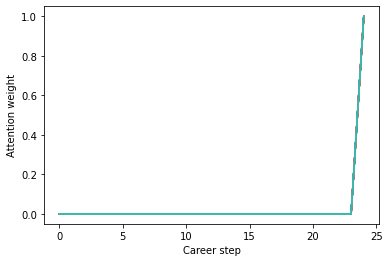

In [370]:
b = time_weights.cpu().detach().numpy()

for _ in range(20):
    c = np.random.randint(0, len(b))
    plt.plot(b[c])
    plt.xlabel("Career step")
    plt.ylabel("Attention weight")

In [371]:
# x, isco_level, source, education, company_name, function_id, isco_code, w2v_list, skill_list, certs_list, license_list, langs_list, address_emb
feature_names = ["Time spent", "Time between", "isco level", "source",
                 "education", "company name", "function", "isco code",
                 "cv", "skills", "certificates", "licenses", "languages", "location"]

skill_embedding_size=50
certs_embedding_size=20
license_embedding_size=3
language_embedding_size=10
address_embedding_size=25
function_embedding_size=50 
isco4_embedding_size=25
education_embedding_size=3
isco_level_embedding_size=3
company_embedding_size=50
source_embedding_size = 1
w2v_embedding_size = 300

embedding_sizes= [0, 1, 2, isco_level_embedding_size, source_embedding_size,
                  education_embedding_size, company_embedding_size, function_embedding_size, 
                  isco4_embedding_size, w2v_embedding_size, skill_embedding_size, certs_embedding_size, 
                  license_embedding_size, language_embedding_size, address_embedding_size]

In [372]:
def merge_layers(output, embedding_sizes):
    """order: start=0, reg_features, isco_level_embedding_size, source_embedding_size, 
              education_embedding_size, company_embedding_size, function_embedding_size, 
              isco4_embedding_size, w2v_embedding_size, skill_embedding_size, 
              certs_embedding_size, license_embedding_size, language_embedding_size, 
              address_embedding_size"""
    
    idxs = np.cumsum(embedding_sizes)
        
    result = np.stack([output[idxs[i]:idxs[i+1]].mean(axis=0) for i in range(len(idxs) - 1)])
            
    return result

In [373]:
def draw_explanation(model, batch, embedding_sizes, feature_names, full_batch=False, enforce_correct=False):
    
    candidate, career, job = batch  
    
    if full_batch == False:
        candidate, career, job = candidate[0].unsqueeze(0), career[0].unsqueeze(0).to(device), job[0].to(device)
    else:
        candidate, career, job = candidate, career.to(device), job.to(device)
                    
    # Find gradients, attention weights, prediction, and ground truth
    pred, feature_weight, temp_weight, values = model(candidate, career)

    if full_batch == False:
        print(f"Predicted class: {pred.argmax(1).item()}\nActual class: {job}")
        feature_weight = feature_weight.squeeze(0)
    else:
        feature_weight = feature_weight.sum(axis=0)
    
    # Convert embedded features to regular features by taking the mean per embedding dimension
    to_plot = merge_layers(feature_weight.T.detach().cpu().abs(), embedding_sizes)
    # to_plot *= temp_weight.detach().cpu().numpy()

    # Sum each feature over the time dimension and normalize    
    feature_weight = to_plot.T.sum(axis=0)
    feature_weight /= feature_weight.sum()
    
    # Normalized feature attention 
    series = pd.Series(feature_weight, index=feature_names).sort_values(ascending=False)    
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
    fig.suptitle("Attention types")

    # Plot total attention for each feature
    sns.barplot(x=series.index, y=series.values, ax=ax1)
    ax1.set_xticklabels(labels=series.index, rotation=90)
    ax1.set_ylabel("Gradient")
    ax1.set_title("Attention per feature")
    
    # Plot total attention for each time step
    if full_batch == False:
        temp_weight = temp_weight[0]
    else:
        temp_weight = temp_weight.sum(axis=0)
    
    ax2.plot(temp_weight.detach().cpu())
    ax2.set_title("Attention per time step")
    ax2.set_ylabel("Attention score")
    ax2.set_xlabel("Time step")
    plt.show()
    
    plt.figure(figsize=(19, 6))
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    
    # Normalize gradients
    to_plot /= to_plot.max() 
    
    sns.heatmap(to_plot, cmap=cmap, xticklabels=range(1, 26), yticklabels=feature_names, cbar_kws={'label': 'Gradient'})
    plt.title("Spatiotemporal attention")
    plt.xlabel("Time step")
    plt.show()
    
    if full_batch == False:
        values = merge_layers(values[0].detach().cpu().T, embedding_sizes)
    else:
        values = merge_layers(values.mean(axis=0).detach().cpu().T, embedding_sizes)
        
    plt.figure(figsize=(19, 6))
    sns.heatmap(values, cmap=cmap, xticklabels=range(1, 26), yticklabels=feature_names, cbar_kws={"label" : "Actual values"})
    plt.title("Actual values of input")
    plt.xlabel("Time step")

In [374]:
batch = next(iter(valloader))

Predicted class: 323
Actual class: 233


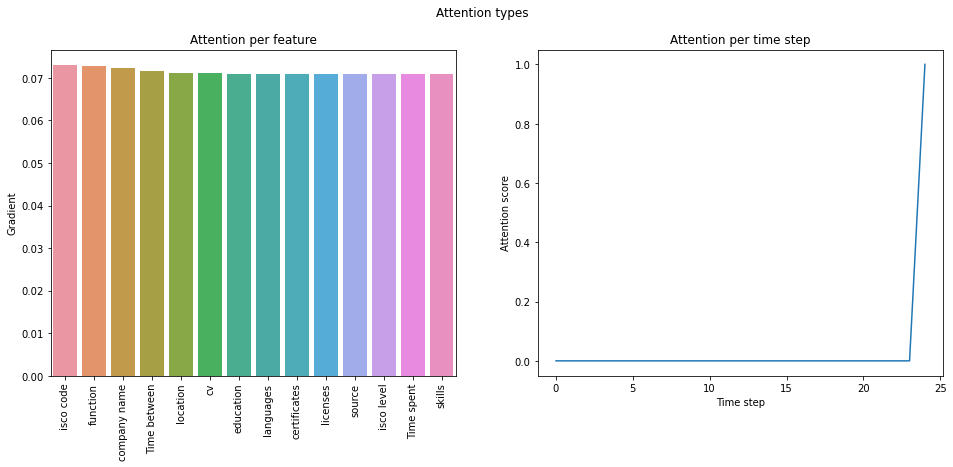

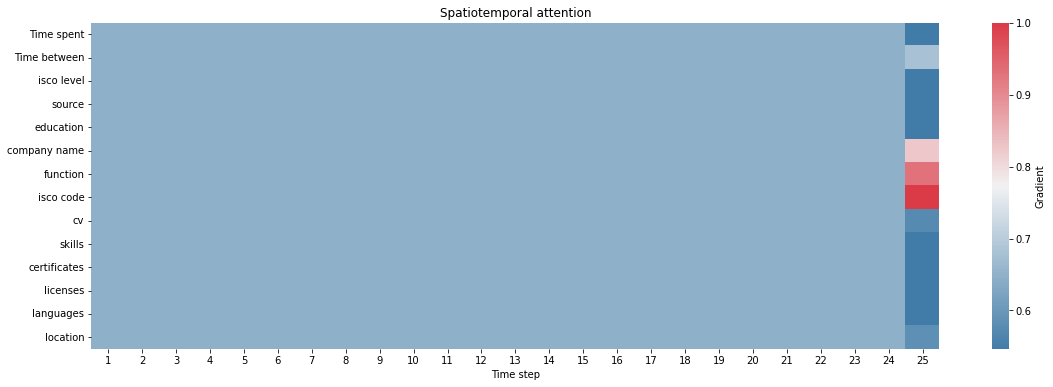

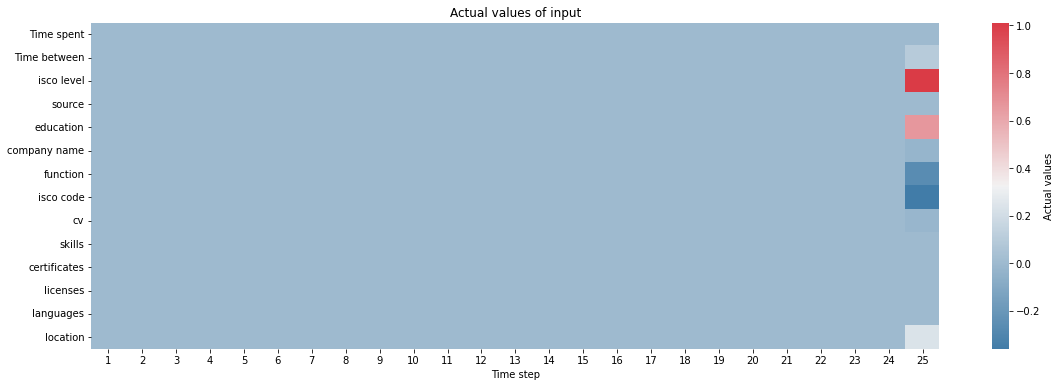

In [375]:
draw_explanation(lstm, batch, embedding_sizes, feature_names, full_batch=False, enforce_correct=True)